<a href="https://colab.research.google.com/github/Zyuuu-G/Quantum_code/blob/main/Quantum_hw_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum hw 9

Ziyu Gao

4/29/2023

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.interpolate import interp1d
#from scipy.optimize import minimize
from scipy import integrate

1) Modify the potential used in the quantum tunneling example from class to now be a quantum well rather than a barrier. Set the depth of the well to be 0.05 and the width to be 10 and evaluate the reflectivity of this system for the following energies: 0.02, 0.03, 0.04, and 0.05. If you see significant reflections, what energy reflects the most? 


E = 0.02
The solver successfully reached the end of the integration interval.
R =  0.12156196895922788
T =  0.8784380310407721

E = 0.03
The solver successfully reached the end of the integration interval.
R =  0.126032535439432
T =  0.873967464560568

E = 0.04
The solver successfully reached the end of the integration interval.
R =  0.12041724481685555
T =  0.8795827551831444

E = 0.05
The solver successfully reached the end of the integration interval.
R =  0.10469646551724957
T =  0.8953035344827505


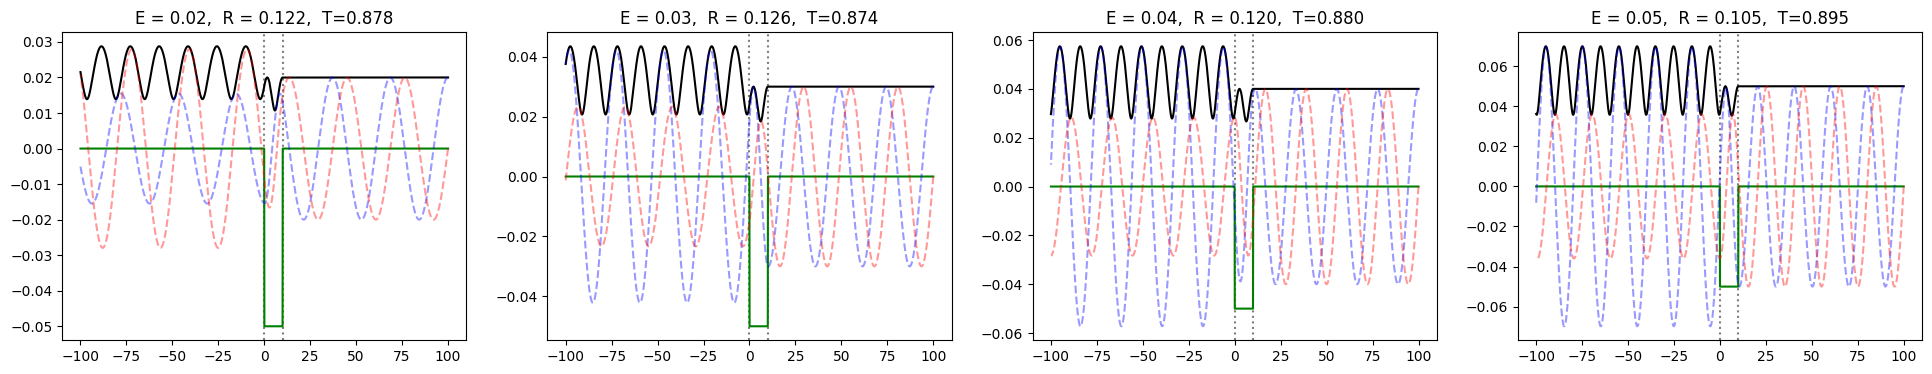

In [ ]:
# probem 1.

def vfun(x,v0=0.025, b=20):
    if x<0: v=0
    elif x>b: v=0
    else:  v=v0
    return v

def TISE(x,psi,E=0.03,v0=.025,b=20):   
    '''
    Defines V and returns derivatives [psi', psi''] from TISE for use in solve_ivp
    INPUT: x and E are numbers, psi is an array [psi, psi']
    RETURNS: [psi', psi''] for solve_ivp
    '''
    dpsi = psi[1]  # first derivative
    d2psi = -2*(E-vfun(x,v0,b))*psi[0] # second derivative

    return [dpsi, d2psi]

v0 = -0.05
b = 10
xMax = 100
num_points=2000

# Make V array for plotting
x = np.linspace(-xMax,xMax,num_points)
V = np.zeros_like(x)
 
# Dr. I extra note: in my code above I got around this by putting 
#                  the for loop inside the vfun function instead.
# can't do whole arrays by just calling vfun(x) :( 
for i,xv in enumerate(x):                      
    V[i] = vfun(xv,v0,b)

ELIST = [0.02, 0.03, 0.04, 0.05]
NUM = len(ELIST)

plt.figure(figsize=(24,4))
for i in range(NUM):
    E = ELIST[i]
    print('\nE =',E)
    kp = np.sqrt(2*(E-vfun(xMax,v0,b)))
    psi0 = [1,1j*kp] # initial psi, psi'
    #print(i,E,kp,psi0)
    psi0 = [E,E*1j*kp] # initial psi, psi'  Changing scale so V is visible
    x_span = [xMax,-xMax] # x range from RIGHT TO LEFT!
    #sol = solve_ivp(TISE, x_span, psi0,args=[E],rtol=1e-7)
    xsol = np.linspace(xMax,-xMax,num_points)  # MAKE Smoother plot by defining extra points
    sol = integrate.solve_ivp(TISE, x_span, psi0,args=[E,v0,b],rtol=1e-7,t_eval=xsol)  
    print(sol.message)

    # PLOT FIG 3.10 RESULTS
    psi = sol.y[0]
    px = sol.t  # x-values for psi
    psimag = np.abs(psi)
    
    # Dr. Daugherity original code just took max and min values of the array
    pmax = psimag[np.where(px<0)].max()
    pmin = psimag[np.where(px<0)].min()
    
    # code to interpolate and find min and max like book
    #int_fun = interp1d(px,np.abs(psi),kind='cubic')
    # define the negative of this to find the max value
    #def int_fun_2(x):
    #    return -1*int_fun(x)
    
    #temp = minimize(int_fun,-22)
    #pmin = int_fun(temp.x)[0]
    #temp = minimize(int_fun_2,-22)
    #pmax = int_fun(temp.x)[0]
    
    R = ( (pmax-pmin)/(pmax+pmin) )**2
    T = 1-R
    print('R = ',R)
    print('T = ',T)

    plt.subplot(1,NUM,i+1)
    plt.axvline(0,c='k', ls=':',alpha=0.5)
    plt.axvline(b,c='k', ls=':',alpha=0.5)
    plt.plot(x, V, 'g-')
    plt.plot(px,np.abs(psi),'k-')
    plt.plot(px,psi.real,'b--',alpha=0.4)
    plt.plot(px,psi.imag,'r--',alpha=0.4)
    plt.title(f"E = {E},  R = {R:4.3f},  T={T:4.3f}")
    #plt.ylim(-0.06,0.06) #XXXXXXXXXXXXXXX
plt.show()

2) Make a graph of tunneling probability versus the barrier width for a barrier that is 0.05 high and a particle with an energy of 0.04. You need to make the graph by evaluating the tunneling probability for 5 points and then plot those points on a graph. (You may make this graph in something you are familiar with rather than python if you prefer.)

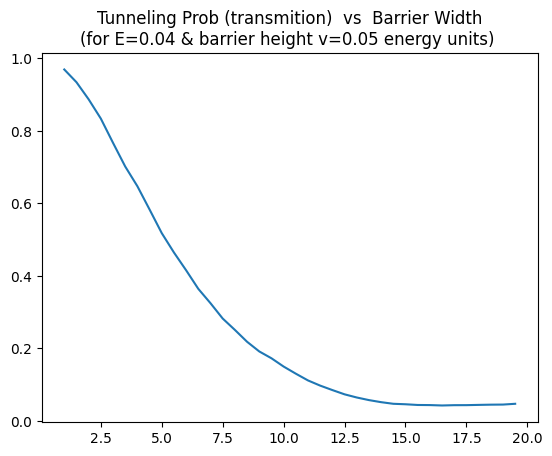

In [ ]:
# Problem 2. 

# vfun() & TISE() are defined in problem 1.
v0 = 0.05
E = 0.04
xMax = 100
num_points=2000
x = np.linspace(-xMax,xMax,num_points)
V = np.zeros_like(x)

brange = np.arange(1,20,0.5)
T = []

for b in brange:
  for i,xv in enumerate(x):                      
      V[i] = vfun(xv,v0,b) # barrier height is set to 0.05

  kp = np.sqrt(2*(E-vfun(xMax,v0,b)))
  psi0 = [1,1j*kp] # initial psi, psi'
  #print(i,E,kp,psi0)
  psi0 = [E,E*1j*kp] # initial psi, psi'  Changing scale so V is visible
  x_span = [xMax,-xMax] # x range from RIGHT TO LEFT!
  #sol = solve_ivp(TISE, x_span, psi0,args=[E],rtol=1e-7)
  xsol = np.linspace(xMax,-xMax,num_points)  # MAKE Smoother plot by defining extra points
  sol = integrate.solve_ivp(TISE, x_span, psi0,args=[E,v0,b],rtol=1e-7,t_eval=xsol)  
  #print(sol.message)

  psi = sol.y[0]
  px = sol.t  # x-values for psi
  psimag = np.abs(psi)
  
  # Dr. Daugherity original code just took max and min values of the array
  pmax = psimag[np.where(px<0)].max()
  pmin = psimag[np.where(px<0)].min()
  
  R = ( (pmax-pmin)/(pmax+pmin) )**2
  #print(R)
  T.append(1-R)

plt.plot(brange,T)    # plotting
plt.title('Tunneling Prob (transmition)  vs  Barrier Width\n(for E=0.04 & barrier height v=0.05 energy units) ')
plt.show()

In [ ]:
print(f'T of b=1~5:{T[:10]}')

T of b=1~5:[0.9688119407800652, 0.9337119639838242, 0.8865017323713721, 0.8333443463254012, 0.766520316324993, 0.7012708117835815, 0.6468274252610259, 0.582606039375587, 0.5174579721244197, 0.4640206330879104]


3) Make a graph of tunneling probability versus particle energy for a barrier that is 5 distance units wide and is 0.05 energy units high.

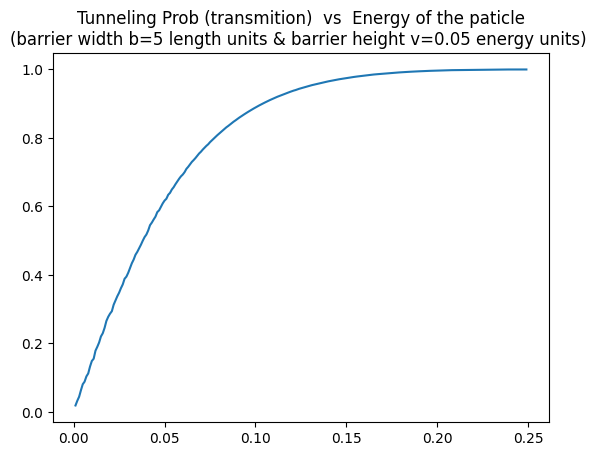

In [ ]:
# problem 3.

# vfun() & TISE() are defined in problem 1.
v0 = 0.05
b = 5
xMax = 100
num_points=2000
x = np.linspace(-xMax,xMax,num_points)
V = np.zeros_like(x)

Erange = np.arange(0.001,0.25,0.001) # setup the E range 
T = []

for i,xv in enumerate(x):                      
      V[i] = vfun(xv,v0,b) # barrier height is set to 0.05

for E in Erange:                 
  kp = np.sqrt(2*(E-vfun(xMax,v0,b)))
  psi0 = [1,1j*kp] # initial psi, psi'
  psi0 = [E,E*1j*kp] # initial psi, psi'  Changing scale so V is visible
  x_span = [xMax,-xMax] # x range from RIGHT TO LEFT!
 
  xsol = np.linspace(xMax,-xMax,num_points)  # MAKE Smoother plot by defining extra points
  sol = integrate.solve_ivp(TISE, x_span, psi0,args=[E,v0,b],rtol=1e-7,t_eval=xsol)  

  psi = sol.y[0]
  px = sol.t  # x-values for psi
  psimag = np.abs(psi)
  
  # Dr. Daugherity original code, took max and min values of the array
  pmax = psimag[np.where(px<0)].max()
  pmin = psimag[np.where(px<0)].min()
  
  R = ( (pmax-pmin)/(pmax+pmin) )**2
  T.append(1-R)

plt.plot(Erange,T)    # plotting
plt.title('Tunneling Prob (transmition)  vs  Energy of the paticle\n(barrier width b=5 length units & barrier height v=0.05 energy units) ')
plt.show()

Problem 4.3. 

Sketch the one-dimensional probability distributions Px(x) and Py(y)
(as deefined in equation 4.7) for the two-peaked wavefunction shown in Figure 4.5. Then
sketch (as two-dimensional density plots, like Figure 4.5) two other wavefunctions, one
separable and one not, that are di erent from this wavefunction yet have the same
Px(x) and Py(y). Describe in some detail what each of these wavefunctions predicts
for the outcomes of sequential measurements of x and y. For instance, if you measure
x and happen to obtain a result near a, what can you then predict about the outcome
of a measurement of y?

In [ ]:
# schorder problem 4.3
'''
def ISW2D(x,y,nx,ny,a=1): 
  # 2D ISW wavefunctions (eq 4.17)
  return (2/a)*np.sin(np.pi*nx*x/a)*np.sin(np.pi*ny*y/a)

def ISW2D_entangled(x,y,nx,ny,a=1): 
  return (2/a)*np.sin(np.pi*nx*(x-0.2)/a)*np.sin(np.pi*ny*(y-0.4)/a) - (2/a)*np.sin(np.pi*nx*(x-0.4)/a)*np.sin(np.pi*ny*(y-0.2)/a)
'''

def ISW2D_book(x,y,a=0.2,b=0.4,width=0.5): 
  # 2D ISW wavefunctions (eq 4.13)
  return np.exp(-(x-a)**2/width**2)*np.exp(-(y-b)**2/width**2)+np.exp(-(x-b)**2/width**2)*np.exp(-(y-a)**2/width**2)

def ISW2D_anti_book(x,y,a=0.2,b=0.4,width=0.5): 
  # 2D ISW wavefunctions (eq 4.13)
  return np.exp(-(x-a)**2/width**2)*np.exp(-(y-a)**2/width**2)+np.exp(-(x-b)**2/width**2)*np.exp(-(y-b)**2/width**2)


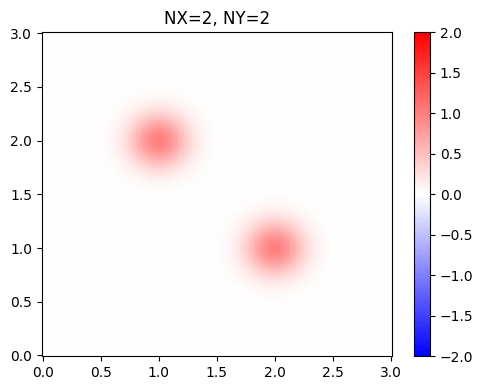

In [ ]:
# original
x = np.linspace(0,3,200)
y = np.linspace(0,3,200)
X,Y = np.meshgrid(x,y)

psi = ISW2D_book(X,Y,1,2,.25)

plt.figure(figsize=(5,4))
plt.pcolormesh(x,y,psi,cmap='bwr',vmax=2,vmin=-2)
#plt.imshow(psi,cmap='bwr')
plt.title(f"NX=2, NY=2")
plt.colorbar()
plt.tight_layout()
plt.show()

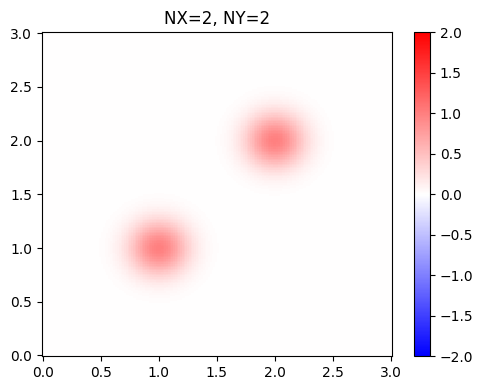

In [ ]:
# non-separable
psi = ISW2D_anti_book(X,Y,2,1,.25)

plt.figure(figsize=(5,4))
plt.pcolormesh(x,y,psi,cmap='bwr',vmax=2,vmin=-2)
#plt.imshow(psi,cmap='bwr')
plt.title(f"NX=2, NY=2")
plt.colorbar()
plt.tight_layout()
plt.show()

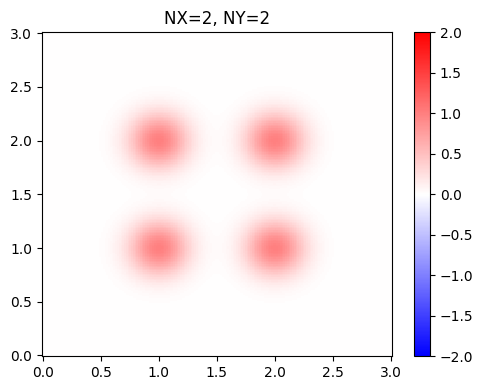

In [ ]:
# separable
psi = ISW2D_book(X,Y,2,1,.25)+ISW2D_anti_book(X,Y,2,1,.25)

plt.figure(figsize=(5,4))
plt.pcolormesh(x,y,psi,cmap='bwr',vmax=2,vmin=-2)
#plt.imshow(psi,cmap='bwr')
plt.title(f"NX=2, NY=2")
plt.colorbar()
plt.tight_layout()
plt.show()

Problem 4.8. 

Most of the energy levels shown in Figure 4.7 are doubly degenerate.
What is the lowest level that is triply degenerate, and what are the corresponding
quantum numbers nx and ny? What is the lowest level with four-fold degeneracy, and
what are the corresponding quantum numbers?

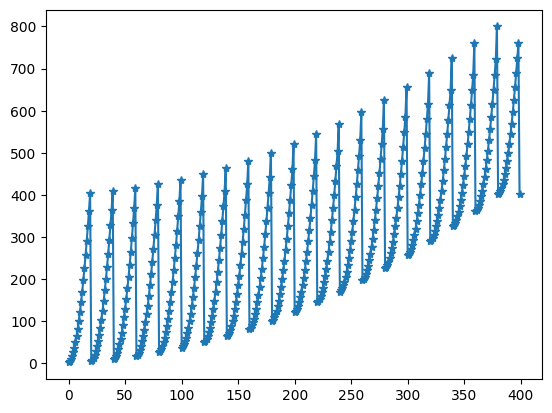

[  2.   5.   5.   8.  10.  10.  13.  13.  17.  17.  18.  20.  20.  25.
  25.  26.  26.  29.  29.  32.  34.  34.  37.  37.  40.  40.  41.  41.
  45.  45.  50.  50.  50.  52.  52.  53.  53.  58.  58.  61.  61.  65.
  65.  65.  65.  68.  68.  72.  73.  73.  74.  74.  80.  80.  82.  82.
  85.  85.  85.  85.  89.  89.  90.  90.  97.  97.  98. 100. 100. 101.
 101. 104. 104. 106. 106. 109. 109. 113. 113. 116. 116. 117. 117. 122.
 122. 125. 125. 125. 125. 128. 130. 130. 130. 130. 136. 136. 137. 137.
 145. 145. 145. 145. 146. 146. 148. 148. 149. 149. 153. 153. 157. 157.
 160. 160. 162. 164. 164. 169. 169. 170. 170. 170. 170. 173. 173. 178.
 178. 180. 180. 181. 181. 185. 185. 185. 185. 193. 193. 194. 194. 197.
 197. 200. 200. 200. 202. 202. 205. 205. 205. 205. 208. 208. 212. 212.
 218. 218. 221. 221. 221. 221. 225. 225. 226. 226. 229. 229. 232. 232.
 233. 233. 234. 234. 241. 241. 242. 244. 244. 245. 245. 250. 250. 250.
 250. 257. 257. 260. 260. 260. 260. 261. 261. 265. 265. 265. 265. 269.
 269. 

In [ ]:
# schorder problem 4.8

nx = np.linspace(1,20,20)
ny = np.linspace(1,20,20)
E = np.zeros(400)
for i in range(len(nx)):
  for j in range(len(ny)):
    E[len(ny)*(i-1)+(j-1)]=nx[i-1]**2+ny[j-1]**2

plt.plot(E,marker='*')
plt.show()

test = np.sort(E)
print(test)

In [ ]:
'''
The lowest level of triply degenerate is E = 50; the wavenumbers are 5,5 / 1,7 / 7,1.
The lowest level with four-fold degeneracy is E = 65; the wavenumbers are 1,8 / 8,1 / 4,7 / 7,4.
'''

In [ ]:
'''
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X,Y,psi)
'''

"\nfig = plt.figure()\nax = fig.add_subplot(projection='3d')\n\nax.scatter(X,Y,psi)\n"